<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Eluvio/blob/main/Eluvio_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


In [73]:
import pandas as pd


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
train_folder='/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Train'
test_folder = '/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Test'

In [76]:
classes = ['Acura',
 'Audi',
 'BMW',
 'Chevrolet',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'KIA',
 'Lamborghini',
 'Lexus',
 'Mazda',
 'MercedesBenz',
 'Nissan',
 'Porsche',
 'Tesla',
 'Toyota',
 'Volkswagen']

In [77]:
class_dict = {'Acura': 0,
 'Audi': 1,
 'BMW': 2,
 'Chevrolet': 3,
 'Ford': 4,
 'Honda': 5,
 'Hyundai': 6,
 'Infiniti': 7,
 'KIA': 8,
 'Lamborghini': 9,
 'Lexus': 10,
 'Mazda': 11,
 'MercedesBenz': 12,
 'Nissan': 13,
 'Porsche': 14,
 'Tesla': 15,
 'Toyota': 16,
 'Volkswagen': 17}

# Load Data

In [78]:
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for  cate in cates: 
    for img_name in os.listdir(data_path + '/'+ cate + '/'):
      i = i +1
      # print(i)
      img = cv2.imread(data_path + '/' + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(class_dict[cate])
  return X, y

In [79]:
X_train, y_train = load_images_and_labels(train_folder, classes)

In [80]:
X_test, y_test = load_images_and_labels(test_folder, classes)

In [81]:
keylist = list(class_dict.keys())

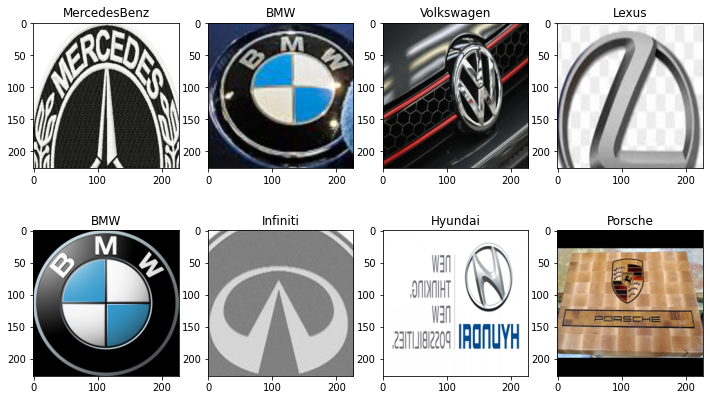

In [82]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

EDA

In [83]:
X_train_df =pd.DataFrame.from_records(X_train)

In [84]:
X_train_df.shape

(900, 227)

In [85]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,"[[248, 247, 252], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[246, 245, 250], [247, 246, 251], [247, 246, ...","[[246, 245, 250], [247, 246, 251], [247, 246, ...","[[247, 246, 251], [247, 246, 251], [247, 246, ...","[[248, 247, 252], [247, 246, 251], [247, 246, ...",...,"[[244, 243, 249], [243, 244, 248], [243, 244, ...","[[244, 244, 248], [242, 245, 248], [242, 245, ...","[[242, 244, 248], [242, 245, 248], [241, 245, ...","[[241, 245, 248], [241, 245, 248], [242, 245, ...","[[242, 244, 248], [242, 244, 248], [243, 244, ...","[[243, 244, 248], [244, 244, 248], [244, 244, ...","[[244, 245, 249], [245, 244, 249], [245, 244, ...","[[244, 245, 249], [244, 245, 249], [244, 245, ...","[[244, 245, 249], [243, 246, 249], [243, 246, ...","[[244, 245, 249], [243, 246, 249], [242, 246, ..."
1,"[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [254, 254, ...","[[255, 255, 255], [255, 255, 255], [246, 246, ...","[[255, 255, 255], [255, 255, 255], [249, 249, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...","[[255, 255, 255], [255, 255, 255], [248, 248, ...",...,"[[255, 255, 255], [255, 255, 255], [250, 250, ...","[[255, 255, 255], [255, 255, 255], [253, 253, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ..."
2,"[[16, 34, 74], [15, 33, 73], [15, 33, 71], [14...","[[15, 33, 71], [15, 33, 71], [14, 32, 70], [13...","[[15, 33, 71], [15, 33, 71], [14, 32, 70], [14...","[[15, 34, 73], [15, 34, 73], [14, 33, 72], [13...","[[15, 34, 74], [15, 34, 74], [14, 33, 73], [14...","[[15, 34, 74], [15, 34, 74], [14, 33, 73], [14...","[[15, 34, 74], [15, 34, 74], [15, 34, 74], [14...","[[15, 34, 74], [15, 34, 74], [15, 34, 74], [15...","[[15, 34, 74], [15, 34, 74], [15, 34, 74], [16...","[[15, 34, 74], [14, 33, 73], [14, 33, 73], [16...",...,"[[22, 41, 81], [21, 40, 80], [21, 40, 80], [22...","[[23, 42, 82], [22, 41, 81], [21, 40, 80], [21...","[[23, 42, 82], [22, 41, 81], [20, 39, 79], [19...","[[22, 41, 81], [21, 40, 80], [19, 38, 78], [20...","[[21, 40, 80], [20, 39, 79], [19, 38, 78], [20...","[[19, 38, 78], [18, 37, 77], [19, 38, 79], [21...","[[19, 38, 78], [18, 37, 77], [20, 39, 80], [23...","[[20, 38, 78], [19, 37, 77], [21, 40, 80], [23...","[[22, 40, 80], [21, 39, 79], [20, 38, 78], [21...","[[22, 40, 80], [21, 39, 79], [21, 39, 79], [21..."
3,"[[73, 124, 190], [73, 124, 190], [73, 124, 190...","[[73, 123, 189], [73, 123, 189], [72, 123, 189...","[[71, 123, 189], [71, 123, 189], [71, 123, 189...","[[70, 123, 189], [70, 123, 189], [69, 122, 188...","[[69, 123, 190], [69, 122, 190], [69, 122, 190...","[[68, 122, 192], [68, 122, 192], [68, 122, 192...","[[68, 122, 192], [67, 121, 191], [67, 121, 191...","[[67, 121, 191], [67, 121, 191], [67, 121, 191...","[[66, 120, 190], [66, 120, 190], [67, 121, 191...","[[65, 121, 190], [64, 121, 190], [66, 122, 191...",...,"[[65, 74, 81], [66, 75, 82], [66, 75, 82], [66...","[[64, 73, 80], [65, 74, 81], [65, 74, 81], [65...","[[65, 74, 81], [64, 73, 80], [64, 73, 80], [63...","[[62, 71, 78], [61, 70, 77], [61, 70, 77], [61...","[[60, 69, 76], [59, 68, 75], [59, 68, 75], [60...","[[61, 70, 

In [86]:
columns= X_train_df.columns

In [88]:
for c in columns:
  if(X_train_df[c].isnull().sum() > 0):
    print(c)

In [89]:
columns

RangeIndex(start=0, stop=227, step=1)

no null values

In [90]:
y_train_df =pd.DataFrame(y_train)

In [91]:
y_train_df.shape

(900, 1)

In [92]:
y_train_df.head

<bound method NDFrame.head of       0
0     0
1     0
2     0
3     0
4     0
..   ..
895  17
896  17
897  17
898  17
899  17

[900 rows x 1 columns]>

In [93]:
y_columns= y_train_df.columns

In [94]:
y_train_df[0]

0       0
1       0
2       0
3       0
4       0
       ..
895    17
896    17
897    17
898    17
899    17
Name: 0, Length: 900, dtype: int64

In [95]:
print(y_columns)

RangeIndex(start=0, stop=1, step=1)


In [97]:
for c in y_columns:
  if(y_train_df[c].isnull().sum() > 0):
    print(c)

no null values in target

In [98]:
y_data = pd.DataFrame()

In [99]:
freq = y_train_df[0].value_counts()

In [100]:
freq

0     50
1     50
16    50
15    50
14    50
13    50
12    50
11    50
10    50
9     50
8     50
7     50
6     50
5     50
4     50
3     50
2     50
17    50
Name: 0, dtype: int64

All classes have same samples. So it is balanced

Exploring the images more

In [101]:
X_train_df.shape

(900, 227)

X_train has 900 samples and each sample is of the size 227*227*3. 


In [102]:
X_test

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0

In [103]:
y_test_df =pd.DataFrame(y_test)

In [105]:
freq_test = y_test_df[0].value_counts()

In [106]:
freq_test

16    9
6     7
11    7
5     7
0     6
15    6
17    6
4     6
2     6
7     5
8     5
1     5
10    5
12    5
13    5
14    5
3     5
9     5
Name: 0, dtype: int64

This is the distribution of each label in the test frame.


In [107]:
keylist = list(class_dict.keys())

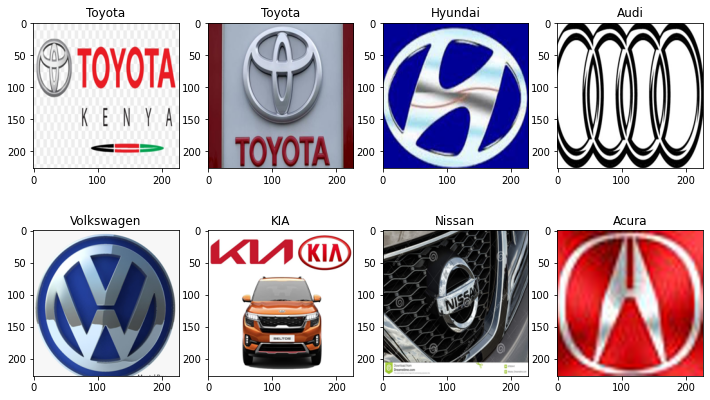

In [108]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

Train Images

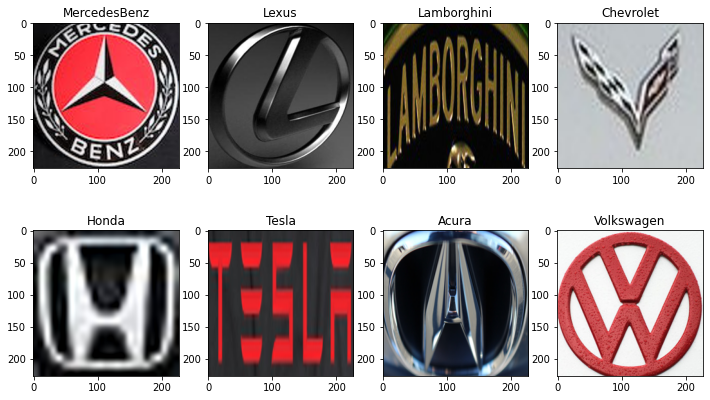

In [109]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_test))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_test[ind])
  plt.title(keylist[y_test[ind]])

Test Images Sample

From looking at sample images, there are logos, test representing the logo and also logos in association with other objects in the same image.